In [21]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
from scipy.stats import distributions
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [22]:
anime = pd.read_csv("anime.csv")

In [23]:
anime.head()

anime_id                title              title_english title_japanese  \
0     11013        Inu x Boku SS  Inu X Boku Secret Service         妖狐×僕SS   
1      2104     Seto no Hanayome      My Bride is a Mermaid          瀬戸の花嫁   
2      5262   Shugo Chara!! Doki         Shugo Chara!! Doki    しゅごキャラ！！どきっ   
3       721        Princess Tutu              Princess Tutu      プリンセスチュチュ   
4     12365  Bakuman. 3rd Season                   Bakuman.          バクマン。   

                                  title_synonyms  \
0                                Youko x Boku SS   
1                           The Inland Sea Bride   
2  Shugo Chara Ninenme, Shugo Chara! Second Year   
3                                            NaN   
4                               Bakuman Season 3   

                                           image_url type    source  episodes  \
0  https://myanimelist.cdn-dena.com/images/anime/...   TV     Manga        12   
1  https://myanimelist.cdn-dena.com/images/anime/...   TV     Manga        26   
2  https://myanimelist.cdn-dena.com/images/anime/...   TV     Manga        51   
3  https://myanimelist.cdn-dena.com/images/anime/...   TV  Original        38   
4  https://myanimelist.cdn-dena.com/images/anime/...   TV     Manga        25   

            status  ...           broadcast  \
0  Finished Airing  ...  Fridays at Unknown   
1  Finished Airing  ...             Unknown   
2  Finished Airing  ...             Unknown   
3  Finished Airing  ...  Fridays at Unknown   
4  Finished Airing  ...             Unknown   

                                             related  \
0  {'Adaptation': [{'mal_id': 17207, 'type': 'man...   
1  {'Adaptation': [{'mal_id': 759, 'type': 'manga...   
2  {'Adaptation': [{'mal_id': 101, 'type': 'manga...   
3  {'Adaptation': [{'mal_id': 1581, 'type': 'mang...   
4  {'Adaptation': [{'mal_id': 9711, 'type': 'mang...   

                                            producer          licensor  \
0  Aniplex, Square Enix, Mainichi Broadcasting Sy...  Sentai Filmworks   
1                  TV Tokyo, AIC, Square Enix, Sotsu        Funimation   
2                                    TV Tokyo, Sotsu               NaN   
3                 Memory-Tech, GANSIS, Marvelous AQL         ADV Films   
4                                      NHK, Shueisha               NaN   

             studio                                     genre  \
0  David Production    Comedy, Supernatural, Romance, Shounen   
1             Gonzo  Comedy, Parody, Romance, School, Shounen   
2         Satelight             Comedy, Magic, School, Shoujo   
3    Hal Film Maker    Comedy, Drama, Magic, Romance, Fantasy   
4         J.C.Staff           Comedy, Drama, Romance, Shounen   

                                       opening_theme  \
0                              ['"Nirvana" by MUCC']   
1                 ['"Romantic summer" by SUN&LUNAR']   
2  ['#1: "Minna no Tamago (みんなのたまご)" by Shugo Cha...   
3             ['"Morning Grace" by Ritsuko Okazaki']   
4  ['#1: "Moshimo no Hanashi (もしもの話)" by nano.RIP...   

                                        ending_theme  duration_min  \
0  ['#1: "Nirvana" by MUCC (eps 1, 11-12)', '#2: ...          24.0   
1  ['#1: "Ashita e no Hikari (明日への光)" by Asuka Hi...          24.0   
2  ['#1: "Rottara Rottara (ロッタラ ロッタラ)" by Buono! ...          24.0   
3  ['"Watashi No Ai Wa Chiisaikeredo" by Ritsuko ...          16.0   
4  ['#1: "Pride on Everyday" by Sphere (eps 1-13)...          24.0   

   aired_from_year  
0             2012  
1             2007  
2             2008  
3             2002  
4             2012  

[5 rows x 33 columns]

# Is a Rating Score of 6.2 Different from the Mean in this Dataset?
# Use the variable score.

In [24]:
anime.score.mean()

6.848998200359928

In [25]:
stats.ttest_1samp(anime['score'], 6.2)

TtestResult(statistic=57.14153988539698, pvalue=0.0, df=6667)

In [26]:
# yes it differs slightly..

# Does Anime that is Still Airing Differ in Popularity from Anime that is No Longer Airing?
# Use the variables status and popularity.

In [27]:
ttest_ind(anime.popularity[anime.status == 'Finished Airing'], anime.popularity[anime.status == 'Currently Airing'])

Ttest_indResult(statistic=-6.489071311277514, pvalue=9.256789141747445e-11)

In [29]:
# no significant difference...

# Does the Source of the Anime Influence the Type of Anime?

In [28]:
# Use the variable source, recoded to have four levels:

# Manga = 0
# Book = 1
# Game = 2
# Listening ( Radio = 3 and Music = 4)
# And use the variable type.

# Recode

In [48]:
def source (series): 
    if series == "Manga":
        return 0
    if series == "Book": 
        return 1
    if series == "Game":
        return 2
    if series == "Radio": 
        return 3
    if series == "Music":
        return 4

# Apply Recode

In [49]:
anime['sourceR'] = anime['source'].apply(source)


# Establish crosstab row and column

In [50]:
anime_crosstab = pd.crosstab(anime['sourceR'], anime['type'])

# Crosstab Table

In [51]:
anime_crosstab

type     Movie  Music  ONA  OVA  Special    TV
sourceR                                       
0.0        324     12   82  586      335  1154
1.0         19      0    0    2        0    24
2.0         78      9   39   57       65   176
3.0          0      0    0    0        1     4
4.0          2     42    0    1        0    10

# Contingency Results

In [52]:
stats.chi2_contingency(anime_crosstab)

Chi2ContingencyResult(statistic=1623.8948117113757, pvalue=0.0, dof=20, expected_freq=array([[3.48954004e+02, 5.19718729e+01, 9.98189940e+01, 5.32917935e+02,
        3.30805096e+02, 1.12853210e+03],
       [6.29880874e+00, 9.38120450e-01, 1.80178690e+00, 9.61945731e+00,
        5.97121112e+00, 2.03706155e+01],
       [5.93487756e+01, 8.83917935e+00, 1.69768365e+01, 9.06366645e+01,
        5.62620781e+01, 1.91936466e+02],
       [6.99867637e-01, 1.04235606e-01, 2.00198544e-01, 1.06882859e+00,
        6.63467902e-01, 2.26340172e+00],
       [7.69854401e+00, 1.14659166e+00, 2.20218398e+00, 1.17571145e+01,
        7.29814692e+00, 2.48974189e+01]]))

In [53]:
# yes it make s a significant difference

# How do the Variables about Popularity / Ranking Relate to Each Other?

In [54]:
 # Use the following variables:

# score
# scored_by
# rank
# popularity
# members
# favorites

# Run a correlation on two variables

In [56]:
anime['popularity'].corr(anime['rank'])


0.7773024303272644

In [62]:
anime2 = anime.drop(['anime_id', 'title', 'title_english', 'title_japanese', 'title_synonyms', 'image_url', 'type', 'source', 'status', 'airing', 'aired_string', 'aired', 'duration', 'rating', 'background', 'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio', 'genre', 'opening_theme', 'ending_theme', 'aired_from_year', 'duration_min', 'sourceR', 'episodes'], axis=1)

In [63]:
anime2.head()

score  scored_by    rank  popularity  members  favorites
0   7.63     139250  1274.0         231   283882       2809
1   7.89      91206   727.0         366   204003       2579
2   7.55      37129  1508.0        1173    70127        802
3   8.21      36501   307.0         916    93312       3344
4   8.67     107767    50.0         426   182765       2082

In [64]:
anime2.corr(method='pearson')

score  scored_by      rank  popularity   members  favorites
score       1.000000   0.381926 -0.898747   -0.688492  0.415626   0.256094
scored_by   0.381926   1.000000 -0.356686   -0.425719  0.987107   0.793949
rank       -0.898747  -0.356686  1.000000    0.777302 -0.391524  -0.208503
popularity -0.688492  -0.425719  0.777302    1.000000 -0.474798  -0.210745
members     0.415626   0.987107 -0.391524   -0.474798  1.000000   0.781565
favorites   0.256094   0.793949 -0.208503   -0.210745  0.781565   1.000000

In [65]:
anime2.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

<AxesSubplot: >

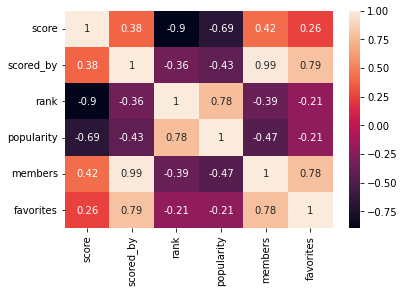

In [66]:
sns.heatmap(anime2.corr(), annot=True)

In [ ]:
# score correlates to rank and popularity
# scored_by correlates to members and favorites
# rank correlates to popularity and favorites
# popularity correlates to memebers and favorites
# members correlates to favorites
# favorites correlates to scored_by, rank, popularity, and members